# **Data Visualization**


Estimated time needed: **45** minutes


In this lab, you will focus on data visualization. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


After completing this lab, you will be able to:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition and comparison of data.




## Demo: How to work with database


Download the database file.


In [2]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-10-10 17:27:29--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv.5’

survey-data.csv.5   100%[===================>] 152.13M  50.3MB/s    in 3.0s    

2025-10-10 17:27:34 (50.3 MB/s) - ‘survey-data.csv.5’ saved [159525875/159525875]



**Install and Import Necessary Python Libraries**

Ensure that you have the required libraries installed to work with SQLite and Pandas:


In [3]:
!pip install pandas 
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 169.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 200.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 133.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 139.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 84.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 125.0 MB/s eta 0:00:00


**Read the CSV File into a Pandas DataFrame**

Load the Stack Overflow survey data into a Pandas DataFrame:


In [10]:
# Read the CSV file
df = pd.read_csv('survey-data.csv')

# Display the first few rows of the data
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


**Create a SQLite Database and Insert the Data**

Now, let's create a new SQLite database (`survey-data.sqlite`) and insert the data from the DataFrame into a table using the sqlite3 library:


In [ ]:
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Write the dataframe to the SQLite database
df.to_sql('main', conn, if_exists='replace', index=False)


# Close the connection
conn.close()


**Verify the Data in the SQLite Database**
Verify that the data has been correctly inserted into the SQLite database by running a simple query:


In [ ]:
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Run a simple query to check the data
QUERY = "SELECT * FROM main LIMIT 5"
df_check = pd.read_sql_query(QUERY, conn)

# Display the results
print(df_check)


## Demo: Running an SQL Query


Count the number of rows in the table named 'main'


In [ ]:
QUERY = """
SELECT COUNT(*) 
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
df.head()


## Demo: Listing All Tables


To view the names of all tables in the database:


In [ ]:
QUERY = """
SELECT name as Table_Name FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


#perbedaan sqlite dan main 
#Dengan kata lain:

#sqlite_master → tempat SQLite menyimpan metadata semua tabel, index, dan view.

#main → nama tabel yang kamu minta informasinya (bukan tempat query dijalankan).

#Jadi:

#🔹 Data dibaca dari sqlite_master
#🔹 Tetapi informasi yang diminta adalah tentang tabel main.


## Demo: Running a Group By Query
    
For example, you can group data by a specific column, like Age, to get the count of respondents in each age group:


In [ ]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
pd.read_sql_query(QUERY, conn)


## Demo: Describing a table

Use this query to get the schema of a specific table, main in this case:


In [ ]:
table_name = 'main'

QUERY = """
SELECT sql FROM sqlite_master 
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY, conn)
print(df.iat[0,0])



#Penjelasan:

#sqlite_master adalah tabel internal bawaan SQLite yang menyimpan metadata semua tabel, 
#view, dan index yang ada di database.

#Kolom sql berisi perintah SQL CREATE TABLE lengkap yang digunakan saat tabel itu dibuat (struktur tabelnya).

#WHERE name = 'main' membatasi hasil hanya untuk tabel dengan nama main

#df = pd.read_sql_query(QUERY, conn)
#Menjalankan query SQL menggunakan koneksi database conn dan menyimpan hasilnya dalam bentuk DataFrame pandas (df).

#conn adalah connection object dari sqlite3.connect('nama_database.db').

#read_sql_query() membaca hasil query SQL langsung ke DataFrame.

#Hasilnya biasanya DataFrame dengan 1 kolom (sql) dan 1 baris yang berisi definisi tabel tersebut.

#print(df.iat[0,0])
#👉 Mengambil baris ke-0, kolom ke-0 dari DataFrame (karena hasilnya hanya 1 sel) dan menampilkannya.
#Biasanya hasilnya berupa teks seperti ini:

## Hands-on Lab


### Visualizing the Distribution of Data

**Histograms**

Plot a histogram of CompTotal (Total Compensation).


In [10]:
#Gunakan Query SQL baru untuk membaca isi tabel
QUERY = "SELECT * FROM main"
df_main = pd.read_sql_query(QUERY, conn)


In [20]:
df_main[['CompTotal']].head(10)

#untuk akses df harus pakai df_main yaitu tabel yang di ambil dari quey sql

,CompTotal
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN
9,NaN


#untuk mencari outlier kita bisa menggunakan uji ambang batas atau IQR 
## Filter outliers
#filtered_data = comp_data[(comp_data >= lower_bound) & (comp_data <= upper_bound)]
#penggunaan kode tersebut agar visualisasi lebih mudah dianalisis


In [12]:
!pip install seaborn

Q1 = 60000.00, Q3 = 250000.00, IQR = 190000.00
Lower Bound = -225000.00, Upper Bound = 535000.00


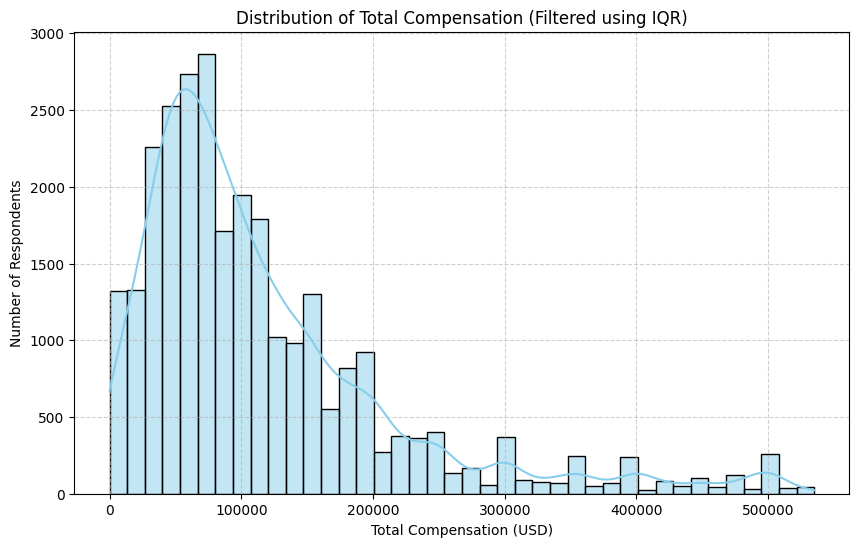

In [13]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Remove missing values
comp_data = df_main['CompTotal'].dropna()

# Calculate quartiles
Q1 = np.percentile(comp_data, 25)
Q3 = np.percentile(comp_data, 75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Q1 = {Q1:.2f}, Q3 = {Q3:.2f}, IQR = {IQR:.2f}")
print(f"Lower Bound = {lower_bound:.2f}, Upper Bound = {upper_bound:.2f}")

# Filter outliers
filtered_data = comp_data[(comp_data >= lower_bound) & (comp_data <= upper_bound)]

# Plot
plt.figure(figsize=(10,6))
sns.histplot(filtered_data, bins=40, kde=True, color='skyblue')
plt.title('Distribution of Total Compensation (Filtered using IQR)')
plt.xlabel('Total Compensation (USD)')
plt.ylabel('Number of Respondents')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


**Box Plots**

Plot a box plot of Age.


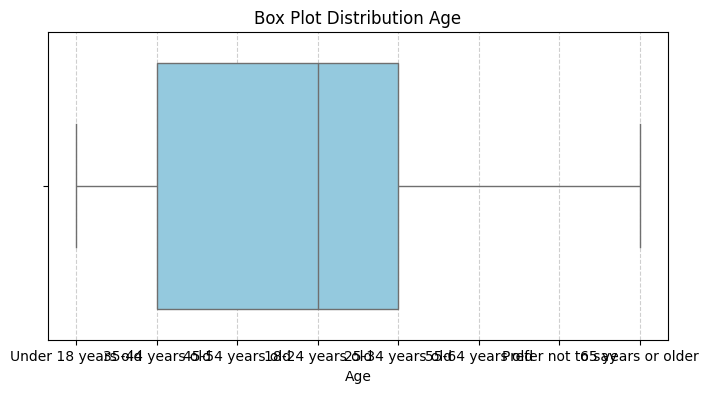

In [14]:
# Select only relevant columns and drop missing values
import matplotlib.pyplot as plt
import seaborn as sns

age_data = df_main['Age'].dropna()

plt.figure(figsize=(8,4))
sns.boxplot(x=age_data, color='skyblue')
plt.title('Box Plot Distribution Age')
plt.xlabel('Age')
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.show()

# Step: Box Plot of Age





### Visualizing Relationships in Data

**Scatter Plots**

Create a scatter plot of Age and WorkExp.


                      Age  WorkExp
0      Under 18 years old      NaN
1         35-44 years old     17.0
2         45-54 years old      NaN
3         18-24 years old      NaN
4         18-24 years old      NaN
...                   ...      ...
65432     18-24 years old      NaN
65433     25-34 years old      NaN
65434     25-34 years old      NaN
65435     18-24 years old      5.0
65436     18-24 years old      NaN

[65437 rows x 2 columns]


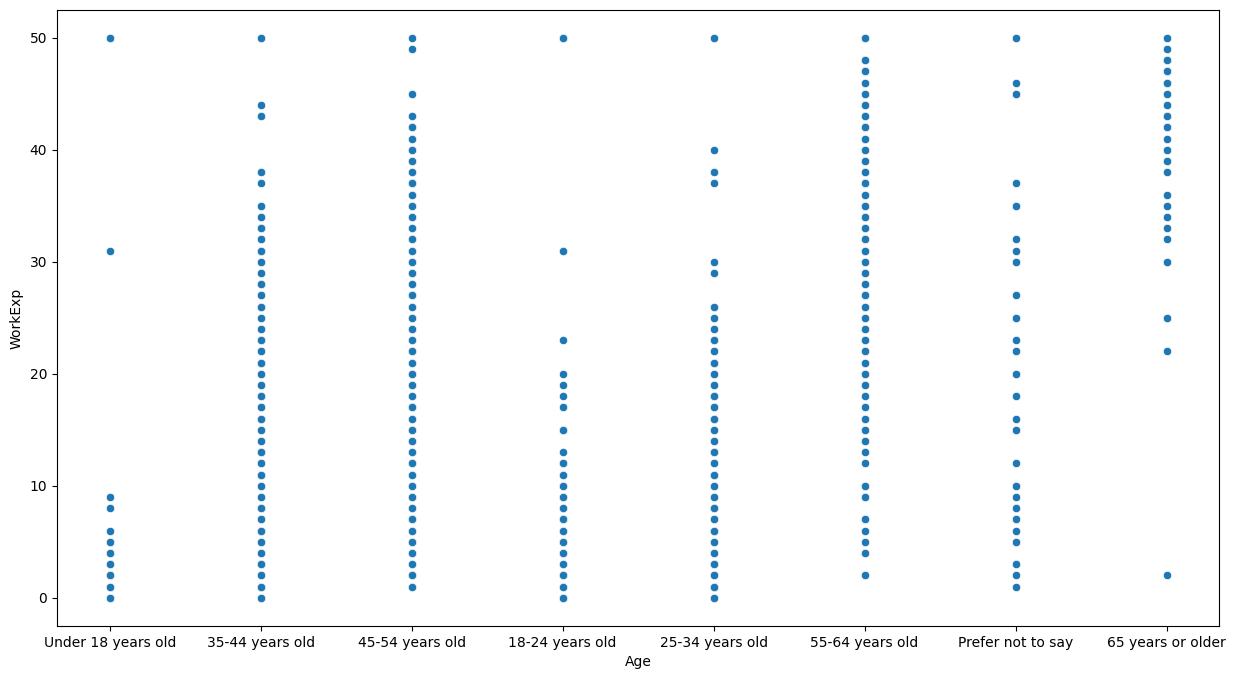

In [15]:
QUERY = """
SELECT Age, WorkExp
FROM main
"""
df = pd.read_sql_query(QUERY,conn)
print(df)

plt.rcParams['figure.figsize'] = [15,8]

sns.scatterplot(data = df, x = 'Age', y = 'WorkExp')

plt.show()

#pakai cara query data 

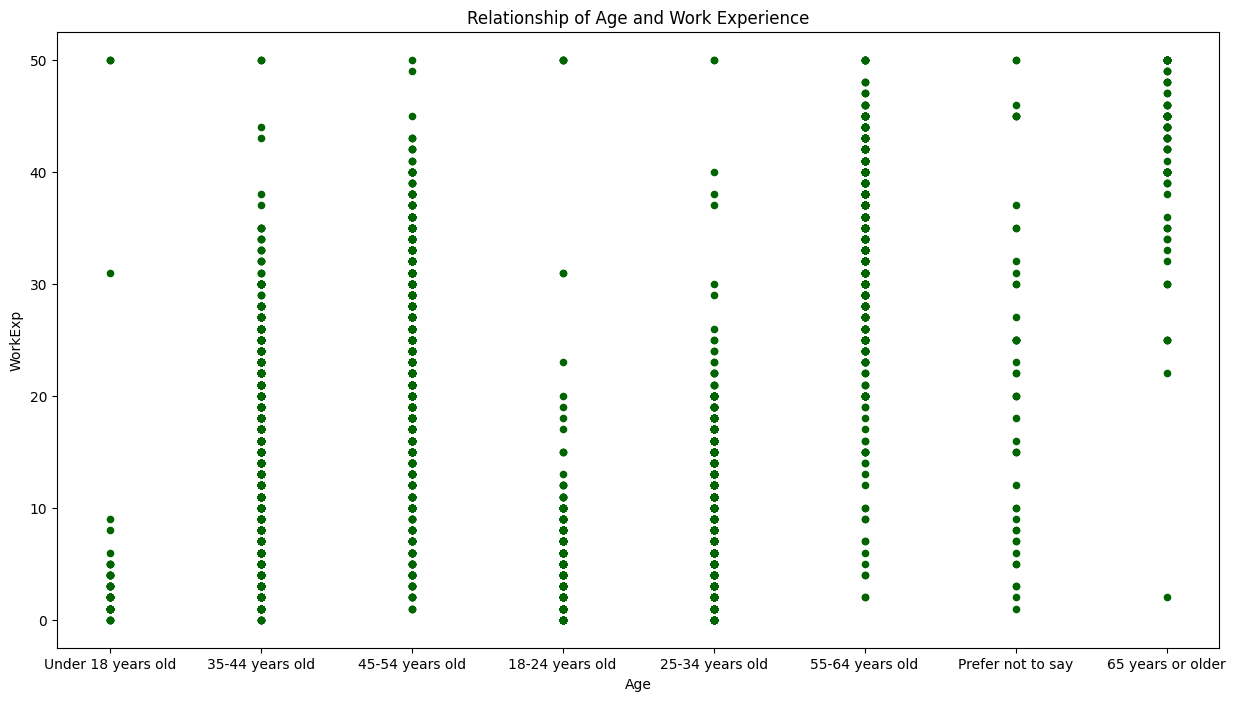

In [16]:
df_main.plot(kind='scatter', x='Age', y='WorkExp', figsize=(15, 8), color='darkgreen') 
plt.title('Relationship of Age and Work Experience')
plt.xlabel('Age')
plt.ylabel('WorkExp')

plt.show()


#pakai cara tanpa query tp pakai df_main

**Bubble Plots**

Create a bubble plot of `TimeSearching` and `Frustration` using the Age column as the bubble size.


In [21]:
QUERY = """
SELECT TimeSearching, Frustration, Age
FROM main
"""
df = pd.read_sql_query(QUERY,conn)
print(df)

age_data = df_main['Age'].dropna()
time_seach = df_main['TimeSearching'].dropna()
frustration_data = df_main['Frustration'].dropna()

plt.rcParams['figure.figsize'] = [15,8]
sns.scatterplot(data= df, x='TimeSearching', y='Frustration', size= 'Age', alpha = 0.6, sizes=(1, 1000))
plt.show()

      TimeSearching Frustration                 Age
0              None        None  Under 18 years old
1              None        None     35-44 years old
2              None        None     45-54 years old
3              None        None     18-24 years old
4              None        None     18-24 years old
...             ...         ...                 ...
65432          None        None     18-24 years old
65433          None        None     25-34 years old
65434          None        None     25-34 years old
65435          None        None     18-24 years old
65436          None        None     18-24 years old

[65437 rows x 3 columns]


NameError: name 'df_main' is not defined

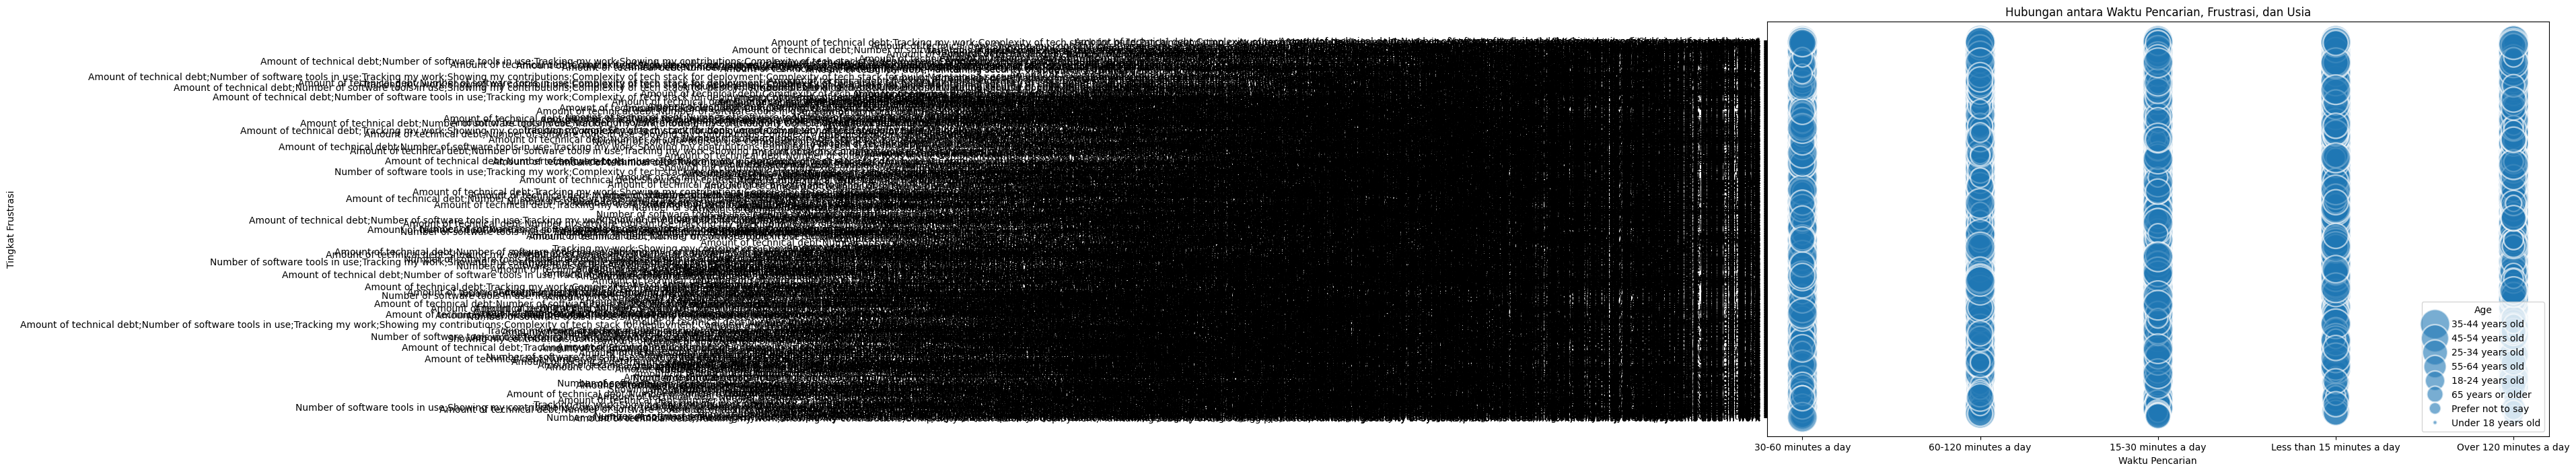

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- KOREKSI 1: Tambahkan 'Age' ke dalam query SQL ---
QUERY = """
SELECT TimeSearching, Frustration, Age
FROM main
"""
# Memuat data dari database ke DataFrame pandas
df = pd.read_sql_query(QUERY, conn)

# Membersihkan data dari baris yang mungkin kosong
df.dropna(inplace=True)

# Mengatur ukuran default plot
plt.rcParams['figure.figsize'] = [15, 8]

# --- KOREKSI 2: Tambahkan parameter size='Age' ---
sns.scatterplot(
    data=df,
    x='TimeSearching',
    y='Frustration',
    size='Age',  # Ini membuat ukuran gelembung berdasarkan usia
    sizes=(20, 1000),  # Mengatur rentang ukuran gelembung agar terlihat jelas
    alpha=0.6  # Mengatur transparansi
)

# Menambahkan judul dan label untuk kejelasan
plt.title('Hubungan antara Waktu Pencarian, Frustrasi, dan Usia')
plt.xlabel('Waktu Pencarian')
plt.ylabel('Tingkat Frustrasi')

# Menampilkan plot
plt.show()

### Visualizing Composition of Data

**Pie Charts**

Create a pie chart of the top 5 databases(`DatabaseWantToWorkWith`) that respondents wish to learn next year.


In [20]:
QUERY = """
SELECT DatabaseWantToWorkWith, COUNT(*) as count
FROM main
GROUP BY DatabaseWantToWorkWith
ORDER BY DatabaseWantToWorkWith
"""
# Memuat data dari database ke DataFrame pandas
df = pd.read_sql_query(QUERY, conn)

# Membersihkan data dari baris yang mungkin kosong
database_data = df_main['DatabaseWantToWorkWith'].dropna()

# Jika ada beberapa database dalam satu baris (misalnya dipisahkan koma), kita pisah dulu
df_split = df_db['DatabaseWantToWorkWith'].str.split(';')
df_exploded = df_split.explode().str.strip()  # pisahkan & bersihkan spasi

# Mengatur ukuran default plot
plt.rcParams['figure.figsize'] = [5, 6]

# autopct create %, start angle represent starting point
df_main['DatabaseWantToWorkWith'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow      
                            )

plt.title('Top 5 Databases Respondents Want to Learn Next Year')
plt.axis('equal') # Sets the pie chart to look like a circle.
plt.legend(labels=df_main.index, loc='upper left') 


plt.show()

NameError: name 'df_main' is not defined

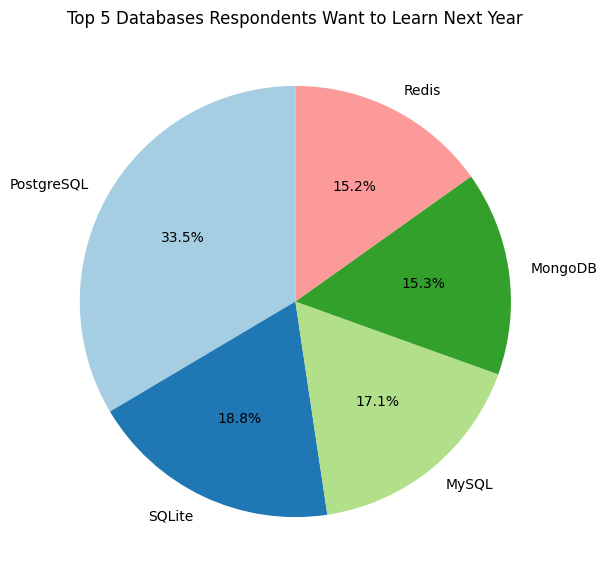

In [18]:
# Step: Visualizing Composition of Data - Pie Chart

import pandas as pd
import matplotlib.pyplot as plt

# Ambil kolom DatabaseWantToWorkWith dari tabel main
QUERY = """
SELECT DatabaseWantToWorkWith
FROM main
"""
df_db = pd.read_sql_query(QUERY, conn)

# Hapus nilai kosong
df_db = df_db.dropna()

# Jika ada beberapa database dalam satu baris (misalnya dipisahkan koma), kita pisah dulu
df_split = df_db['DatabaseWantToWorkWith'].str.split(';')
df_exploded = df_split.explode().str.strip()  # pisahkan & bersihkan spasi

# Hitung jumlah tiap database
db_counts = df_exploded.value_counts().head(5)

# Plot pie chart
plt.figure(figsize=(7,7))
plt.pie(
    db_counts,
    labels=db_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Paired.colors
)
plt.title('Top 5 Databases Respondents Want to Learn Next Year')
plt.show()


**Stacked Charts** 

Create a stacked bar chart of median `TimeSearching` and `TimeAnswering` for the age group 30 to 35.


In [ ]:
## Write your code here

### Visualizing Comparison of Data

**Line Chart**

Plot the median `CompTotal` for all ages from 45 to 60.


In [ ]:
## Write your code here

**Bar Chart**

Create a horizontal bar chart using the `MainBranch` column.


In [ ]:
## Write your code here

### Summary


In this lab, you focused on extracting and visualizing data from an RDBMS using SQL queries and SQLite. You applied various visualization techniques, including:

- Histograms to display the distribution of CompTotal.
- Box plots to show the spread of ages.
- Scatter plots and bubble plots to explore relationships between variables like Age, WorkExp, `TimeSearching` and `TimeAnswering`.
- Pie charts and stacked charts to visualize the composition of data.
- Line charts and bar charts to compare data across categories.


### Close the Database Connection

Once the lab is complete, ensure to close the database connection:


In [ ]:
conn.close()